### **Import and Setup Path**

In [ ]:
import os
import shutil
import pathlib

from google.colab import drive
drive.mount('/content/drive')

dataset_root = pathlib.Path(r"/content/drive/MyDrive/cats_vs_dogs_small")


print("Dataset path set successfully:", dataset_root)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset path set successfully: /content/drive/MyDrive/cats_vs_dogs_small


### **Data Preprocessing & Augmentation**

**1. Base Model teja_model_basic**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Input layer
input_layer = keras.Input(shape=(180, 180, 3))
normalized_layer = layers.Rescaling(1./255)(input_layer)

# Convolutional layers
conv1 = layers.Conv2D(32, 3, activation="relu")(normalized_layer)
pool1 = layers.MaxPooling2D(2)(conv1)

conv2 = layers.Conv2D(64, 3, activation="relu")(pool1)
pool2 = layers.MaxPooling2D(2)(conv2)

conv3 = layers.Conv2D(128, 3, activation="relu")(pool2)
pool3 = layers.MaxPooling2D(2)(conv3)

conv4 = layers.Conv2D(256, 3, activation="relu")(pool3)
pool4 = layers.MaxPooling2D(2)(conv4)

conv5 = layers.Conv2D(256, 3, activation="relu")(pool4)
flat_layer = layers.Flatten()(conv5)

# Output layer
output_layer = layers.Dense(1, activation="sigmoid")(flat_layer)

# Unique model name
teja_model_basic = keras.Model(inputs=input_layer, outputs=output_layer)

**2. Model with Dropout teja_model_dropout**

In [ ]:
# Define model with dropout
input_dropout = keras.Input(shape=(180, 180, 3))
norm_dropout = layers.Rescaling(1./255)(input_dropout)

conv1_d = layers.Conv2D(32, 3, activation="relu")(norm_dropout)
pool1_d = layers.MaxPooling2D(2)(conv1_d)

conv2_d = layers.Conv2D(64, 3, activation="relu")(pool1_d)
pool2_d = layers.MaxPooling2D(2)(conv2_d)

conv3_d = layers.Conv2D(128, 3, activation="relu")(pool2_d)
pool3_d = layers.MaxPooling2D(2)(conv3_d)

conv4_d = layers.Conv2D(256, 3, activation="relu")(pool3_d)
pool4_d = layers.MaxPooling2D(2)(conv4_d)

conv5_d = layers.Conv2D(256, 3, activation="relu")(pool4_d)
flat_d = layers.Flatten()(conv5_d)

dropout_layer = layers.Dropout(0.5)(flat_d)

output_dropout = layers.Dense(1, activation="sigmoid")(dropout_layer)

# Unique model name
teja_model_dropout = keras.Model(inputs=input_dropout, outputs=output_dropout)

**3. Model with L2 Regularization teja_model_l2**

In [ ]:
from tensorflow.keras import regularizers

input_l2 = keras.Input(shape=(180, 180, 3))
norm_l2 = layers.Rescaling(1./255)(input_l2)

conv1_l2 = layers.Conv2D(32, 3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(norm_l2)
pool1_l2 = layers.MaxPooling2D(2)(conv1_l2)

conv2_l2 = layers.Conv2D(64, 3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(pool1_l2)
pool2_l2 = layers.MaxPooling2D(2)(conv2_l2)

conv3_l2 = layers.Conv2D(128, 3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(pool2_l2)
pool3_l2 = layers.MaxPooling2D(2)(conv3_l2)

conv4_l2 = layers.Conv2D(256, 3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(pool3_l2)
pool4_l2 = layers.MaxPooling2D(2)(conv4_l2)

conv5_l2 = layers.Conv2D(256, 3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(pool4_l2)
flat_l2 = layers.Flatten()(conv5_l2)

output_l2 = layers.Dense(1, activation="sigmoid")(flat_l2)

# Unique model name
teja_model_l2 = keras.Model(inputs=input_l2, outputs=output_l2)

**4. Model with Dropout + L2 teja_model_fullreg**

In [ ]:
input_fullreg = keras.Input(shape=(180, 180, 3))
norm_fullreg = layers.Rescaling(1./255)(input_fullreg)

conv1_f = layers.Conv2D(32, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(norm_fullreg)
pool1_f = layers.MaxPooling2D(2)(conv1_f)

conv2_f = layers.Conv2D(64, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(pool1_f)
pool2_f = layers.MaxPooling2D(2)(conv2_f)

conv3_f = layers.Conv2D(128, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(pool2_f)
pool3_f = layers.MaxPooling2D(2)(conv3_f)

conv4_f = layers.Conv2D(256, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(pool3_f)
pool4_f = layers.MaxPooling2D(2)(conv4_f)

conv5_f = layers.Conv2D(256, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(pool4_f)
flat_f = layers.Flatten()(conv5_f)

dropout_f = layers.Dropout(0.25)(flat_f)

output_f = layers.Dense(1, activation="sigmoid")(dropout_f)

# Unique model name
teja_model_fullreg = keras.Model(inputs=input_fullreg, outputs=output_f)

**View Model Summary**

In [ ]:
teja_model_basic.summary()
teja_model_dropout.summary()
teja_model_l2.summary()
teja_model_fullreg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Step 1: Compile Teja’s Models**

In [ ]:
# Compile all Teja models
teja_model_basic.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

teja_model_dropout.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

teja_model_l2.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

teja_model_fullreg.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

**Step 2: Load Datasets from Google Drive**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Set seed for reproducibility
seed = 42
tf.random.set_seed(seed)

# Load datasets
train_full_data = image_dataset_from_directory(
    dataset_root / "train",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

val_full_data = image_dataset_from_directory(
    dataset_root / "validation",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

test_full_data = image_dataset_from_directory(
    dataset_root / "test",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Step 3: Create Dataset Splits**

In [ ]:
# Create smaller datasets with different sample sizes
ds_train_1000 = train_full_data.take(1000)
ds_train_1500 = train_full_data.take(1500)
ds_train_500 = train_full_data.take(500)
ds_train_2000 = train_full_data.shuffle(buffer_size=2000)

# Validation sets
ds_val_500 = val_full_data.take(500)
ds_val_1000 = val_full_data.take(1000)

# Test set
ds_test_500 = test_full_data.take(500)

**Step 1: Explore Dataset Shapes**



In [ ]:
import numpy as np
import tensorflow as tf

# Simulate some random data
teja_random_data = np.random.normal(size=(1000, 16))
sample_ds = tf.data.Dataset.from_tensor_slices(teja_random_data)

# Preview first few samples
for idx, item in enumerate(sample_ds):
    print("Teja Sample Shape:", item.shape)
    if idx >= 2:
        break

Teja Sample Shape: (16,)
Teja Sample Shape: (16,)
Teja Sample Shape: (16,)


**Step 2: Batching the Dataset**

In [ ]:
# Batch into groups of 32
batched_teja_ds = sample_ds.batch(32)

for i, batch in enumerate(batched_teja_ds):
    print("Teja Batch Shape:", batch.shape)
    if i >= 2:
        break

Teja Batch Shape: (32, 16)
Teja Batch Shape: (32, 16)
Teja Batch Shape: (32, 16)


**Step 3: Reshape Each Sample**

In [ ]:
reshaped_teja_ds = sample_ds.map(lambda x: tf.reshape(x, (4, 4)))

for i, reshaped in enumerate(reshaped_teja_ds):
    print("Reshaped Teja Sample:", reshaped.shape)
    if i >= 2:
        break

Reshaped Teja Sample: (4, 4)
Reshaped Teja Sample: (4, 4)
Reshaped Teja Sample: (4, 4)


**Step 4: Inspect Actual Batches from Image Data**

In [ ]:
# Let's inspect one batch from the real image dataset
for x_batch, y_batch in ds_train_1000:
    print("📦 Image Batch Shape:", x_batch.shape)
    print("🏷️  Label Batch Shape:", y_batch.shape)
    break

📦 Image Batch Shape: (32, 180, 180, 3)
🏷️  Label Batch Shape: (32,)


**Step 5: Define Callbacks for Training**

In [ ]:
from tensorflow import keras

training_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="teja_cnn_best.keras",   # Renamed file
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]

**Training 1: Basic Model (1000 Samples)**

In [ ]:
history_basic_1000 = teja_model_basic.fit(
    ds_train_1000,
    epochs=30,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 361s 6s/step - accuracy: 0.4953 - loss: 0.7166 - val_accuracy: 0.4990 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.5144 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.7195
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.5324 - loss: 0.6934 - val_accuracy: 0.6330 - val_loss: 0.6734
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.6214 - loss: 0.6673 - val_accuracy: 0.6410 - val_loss: 0.6398
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.6475 - loss: 0.6409 - val_accuracy: 0.6140 - val_loss: 0.6932
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.6740 - loss: 0.6139 - val_accuracy: 0.6720 - val_loss: 0.5932
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7042 - loss: 0.5753 - val_accuracy: 0.7140 - val_loss: 0.5630
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7152 - loss: 0.5397 - val_accura

**Training 2: Basic Model (500 Samples)**

In [ ]:
# Clone and compile model
teja_model_basic_500 = keras.models.clone_model(teja_model_basic)
teja_model_basic_500.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

# Train the model
history_basic_500 = teja_model_basic_500.fit(
    ds_train_500,
    epochs=30,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.5084 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.5375 - loss: 0.6927 - val_accuracy: 0.5650 - val_loss: 0.6849
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.5927 - loss: 0.6733 - val_accuracy: 0.6560 - val_loss: 0.6202
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.6272 - loss: 0.6396 - val_accuracy: 0.6170 - val_loss: 0.6678
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.6655 - loss: 0.6217 - val_accuracy: 0.6110 - val_loss: 0.6936
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6882 - loss: 0.5866 - val_accuracy: 0.6200 - val_loss: 0.6706
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.7142 - loss: 0.5356 - val_accuracy: 0.6430 - val_loss: 0.7298
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.7470 - loss: 0.5179 - val_accur

**Training 3: Basic Model (1500 Samples)Training 3: Basic Model (1500 Samples)**

In [ ]:
teja_model_basic_1500 = keras.models.clone_model(teja_model_basic)
teja_model_basic_1500.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

history_basic_1500 = teja_model_basic_1500.fit(
    ds_train_1500,
    epochs=30,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.5057 - loss: 0.7125 - val_accuracy: 0.4990 - val_loss: 0.6925
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.5059 - loss: 0.6934 - val_accuracy: 0.5020 - val_loss: 0.6906
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.5422 - loss: 0.6902 - val_accuracy: 0.4990 - val_loss: 1.3478
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.5853 - loss: 0.7204 - val_accuracy: 0.6160 - val_loss: 0.6406
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.6604 - loss: 0.6258 - val_accuracy: 0.6120 - val_loss: 0.6965
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.6774 - loss: 0.6133 - val_accuracy: 0.6010 - val_loss: 0.8128
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.6862 - loss: 0.5922 - val_accuracy: 0.7000 - val_loss: 0.5836
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.7189 - loss: 0.5429 - val_accur

**Training 4: Dropout Model (2000 Samples)**

In [ ]:
# Clone the original dropout model
teja_model_dropout_2000 = keras.models.clone_model(teja_model_dropout)
teja_model_dropout_2000.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

# Train with 2000 samples
history_dropout_2000 = teja_model_dropout_2000.fit(
    ds_train_2000,
    epochs=30,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.5028 - loss: 0.7290 - val_accuracy: 0.5000 - val_loss: 0.7897
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.5470 - loss: 0.6905 - val_accuracy: 0.4990 - val_loss: 0.7044
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.5408 - loss: 0.6879 - val_accuracy: 0.5730 - val_loss: 0.6764
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.6081 - loss: 0.6588 - val_accuracy: 0.6490 - val_loss: 0.6337
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.6470 - loss: 0.6149 - val_accuracy: 0.5120 - val_loss: 1.1093
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.6651 - loss: 0.6388 - val_accuracy: 0.7040 - val_loss: 0.5791
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.7086 - loss: 0.5462 - val_accuracy: 0.6930 - val_loss: 0.5696
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.7582 - loss: 0.5109 - val_accurac

**Training 5: Dropout Model (1000 Samples)**

In [ ]:
history_dropout_1000 = keras.models.clone_model(teja_model_dropout)
history_dropout_1000.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history_dropout_1000 = history_dropout_1000.fit(
    ds_train_1000,
    epochs=30,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.5078 - loss: 0.7150 - val_accuracy: 0.4990 - val_loss: 0.6923
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.5371 - loss: 0.6951 - val_accuracy: 0.6200 - val_loss: 0.6813
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5705 - loss: 0.6871 - val_accuracy: 0.6410 - val_loss: 0.6531
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.6183 - loss: 0.6656 - val_accuracy: 0.5000 - val_loss: 0.8153
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.6152 - loss: 0.6690 - val_accuracy: 0.6410 - val_loss: 0.6306
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.6643 - loss: 0.6211 - val_accuracy: 0.6490 - val_loss: 0.6318
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.6902 - loss: 0.5954 - val_accuracy: 0.6370 - val_loss: 0.6230
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.6939 - loss: 0.5904 - val_accur

**Training 6: L2 Regularized Model (Run for 2 Epochs Only)**

In [ ]:
history_l2_earlystop = teja_model_l2.fit(
    ds_train_1000,
    epochs=2,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - accuracy: 0.5092 - loss: 2.4409 - val_accuracy: 0.4980 - val_loss: 0.9139
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.4823 - loss: 0.8202 - val_accuracy: 0.5000 - val_loss: 0.7035


**Training 7: Dropout + L2 Model**

In [ ]:
history_fullreg = teja_model_fullreg.fit(
    ds_train_1000,
    epochs=30,
    validation_data=ds_val_500,
    callbacks=training_callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.5030 - loss: 1.1681 - val_accuracy: 0.5000 - val_loss: 0.9602
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.5175 - loss: 0.9189 - val_accuracy: 0.5290 - val_loss: 0.8188
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.5369 - loss: 0.7991 - val_accuracy: 0.5530 - val_loss: 0.7442
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.5821 - loss: 0.7341 - val_accuracy: 0.5070 - val_loss: 0.7329
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.5930 - loss: 0.6945 - val_accuracy: 0.6410 - val_loss: 0.6550
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.6455 - loss: 0.6636 - val_accuracy: 0.6370 - val_loss: 0.6444
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.6378 - loss: 0.6580 - val_accuracy: 0.6490 - val_loss: 0.6346
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.6167 - loss: 0.6553 - val_accur

**Step 1: Teja's Training History Plotter**

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation performance
def visualize_model_performance(history, label):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, "bo-", label="Train Acc")
    plt.plot(epochs, val_acc, "r^-", label="Val Acc")
    plt.title(f"{label} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, "bo-", label="Train Loss")
    plt.plot(epochs, val_loss, "r^-", label="Val Loss")
    plt.title(f"{label} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

**Step 2: Plot All Teja Models**

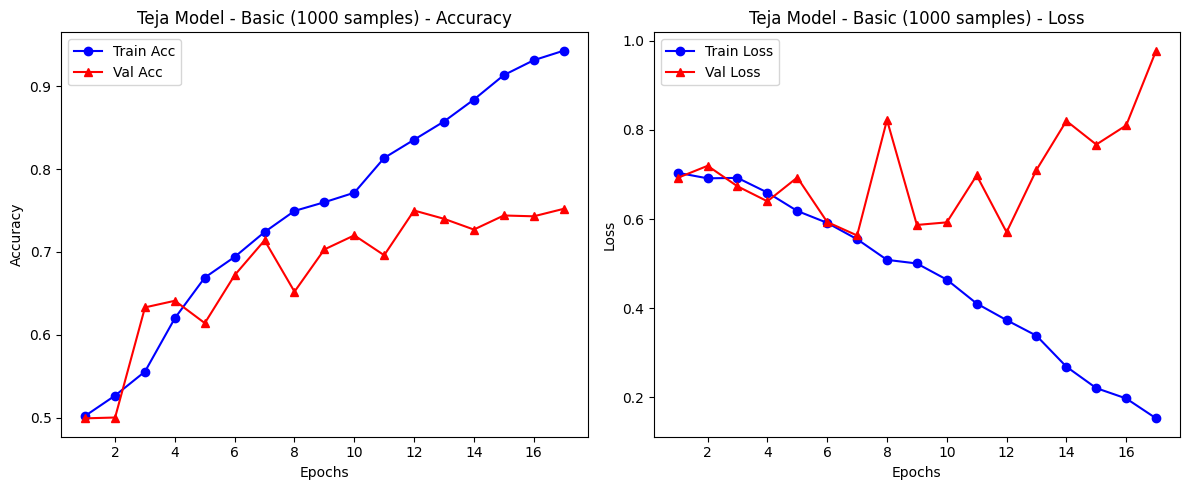

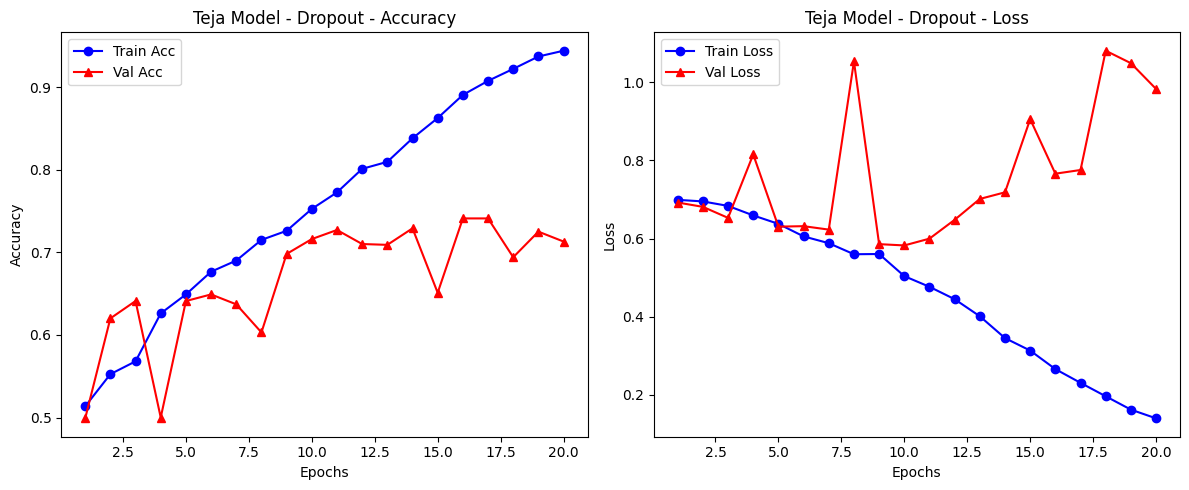

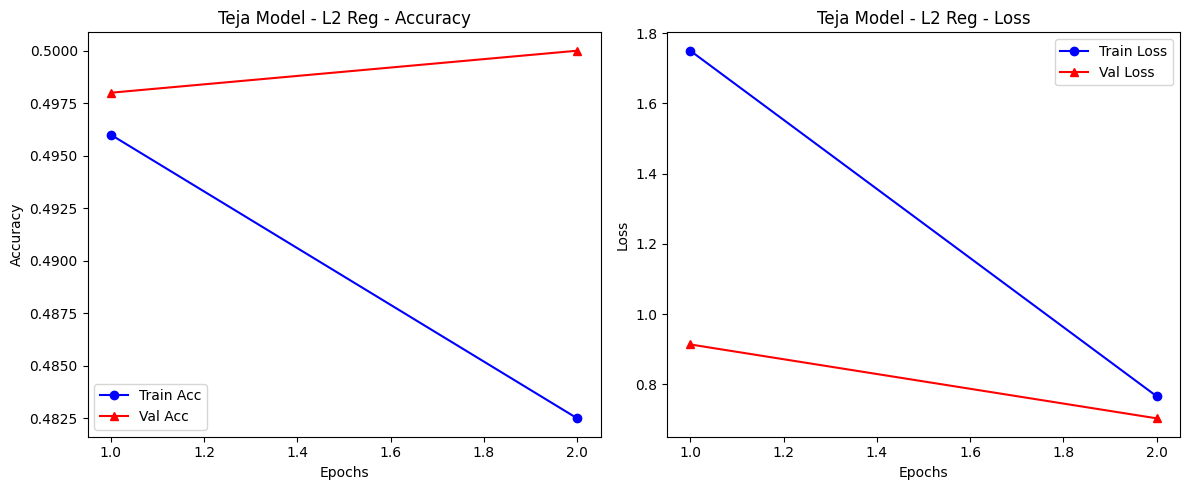

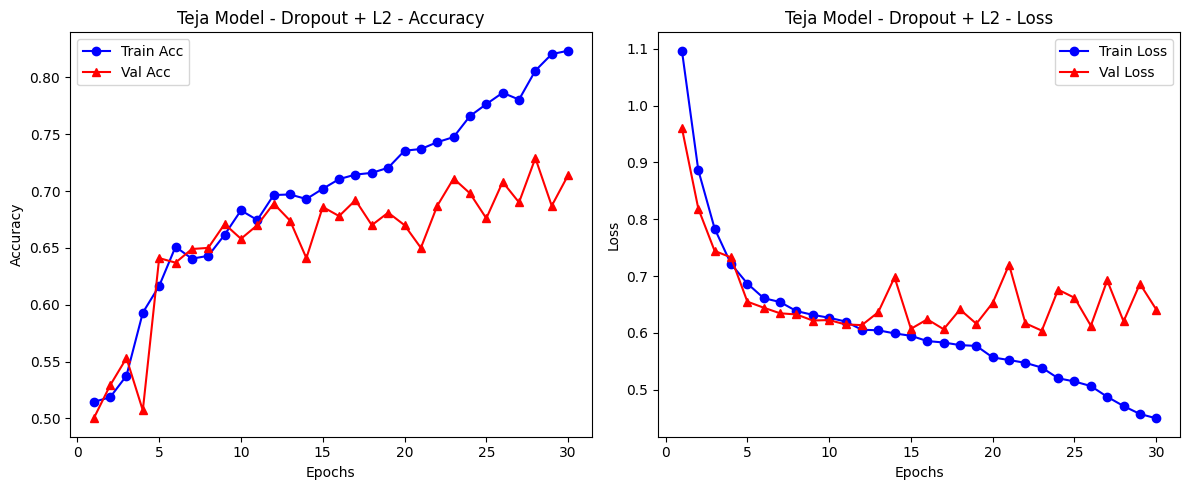

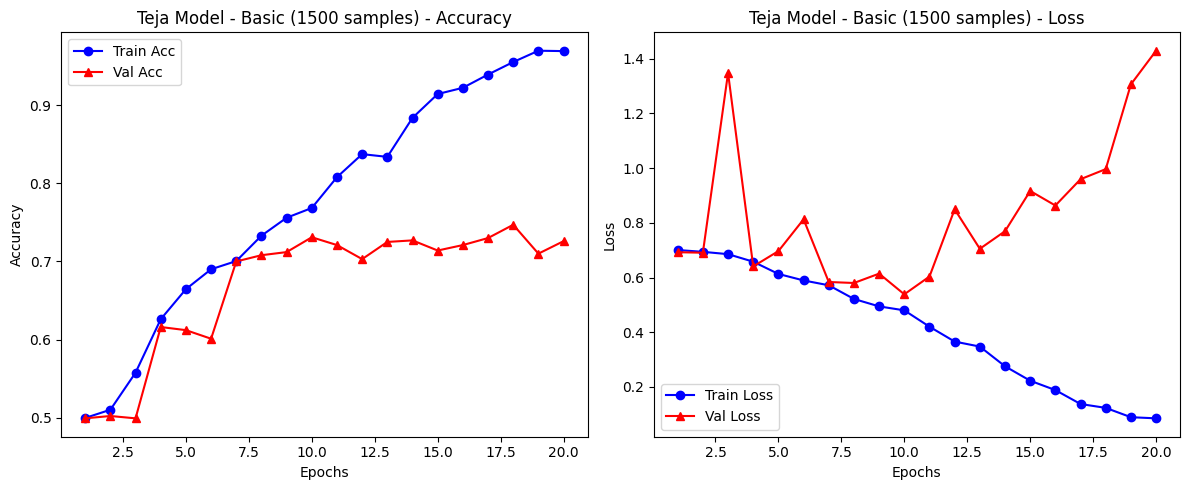

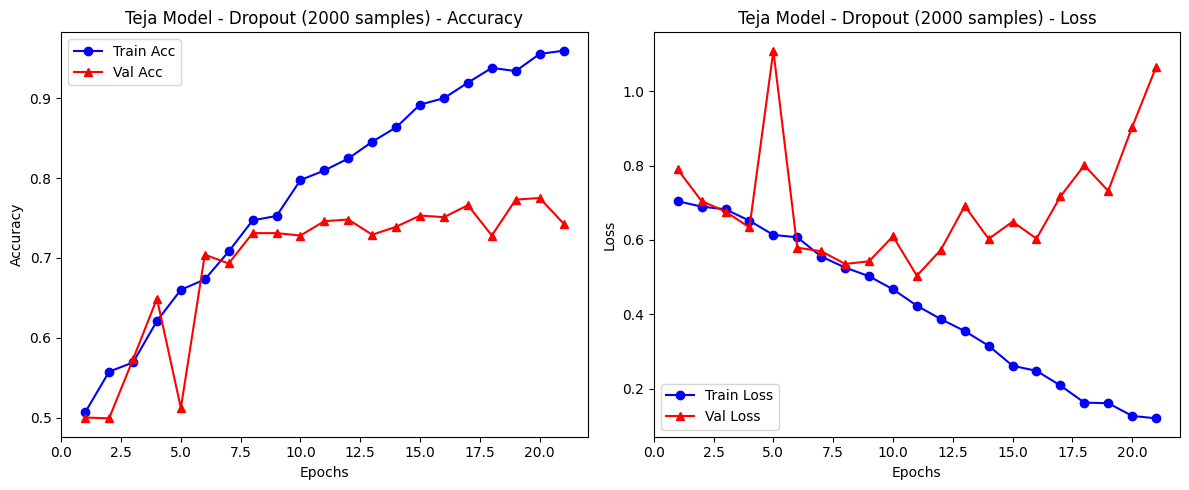

In [ ]:
visualize_model_performance(history_basic_1000, "Teja Model - Basic (1000 samples)")
visualize_model_performance(history_dropout_1000, "Teja Model - Dropout")
visualize_model_performance(history_l2_earlystop, "Teja Model - L2 Reg")
visualize_model_performance(history_fullreg, "Teja Model - Dropout + L2")
visualize_model_performance(history_basic_1500, "Teja Model - Basic (1500 samples)")
visualize_model_performance(history_dropout_2000, "Teja Model - Dropout (2000 samples)")

**Step 3: Evaluate All Models on Test Set**

In [ ]:
def test_model_performance(model, label, test_data):
    test_loss, test_acc = model.evaluate(test_data)
    print(f"{label} - Test Accuracy: {test_acc:.3f}")

In [ ]:
test_model_performance(teja_model_basic, "Teja Basic 1000", ds_test_500)
test_model_performance(teja_model_basic_500, "Teja Basic 500", ds_test_500)
test_model_performance(teja_model_basic_1500, "Teja Basic 1500", ds_test_500)
test_model_performance(teja_model_dropout, "Teja Dropout 1000", ds_test_500)
test_model_performance(teja_model_dropout_2000, "Teja Dropout 2000", ds_test_500)
test_model_performance(teja_model_l2, "Teja L2 Regularized", ds_test_500)
test_model_performance(teja_model_fullreg, "Teja Dropout + L2", ds_test_500)

32/32 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.6982 - loss: 0.5886
📊 Teja Basic 1000 - Test Accuracy: 0.702
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.7402 - loss: 0.5405
📊 Teja Basic 500 - Test Accuracy: 0.722
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7172 - loss: 0.5569 
📊 Teja Basic 1500 - Test Accuracy: 0.716
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5068 - loss: 0.6936
📊 Teja Dropout 1000 - Test Accuracy: 0.497
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7325 - loss: 0.5258
📊 Teja Dropout 2000 - Test Accuracy: 0.728
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.4951 - loss: 0.7036
📊 Teja L2 Regularized - Test Accuracy: 0.500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6875 - loss: 0.6643
📊 Teja Dropout + L2 - Test Accuracy: 0.685


### **Feature Extraction with VGG16**
**Step 1: Load Pretrained VGG16 Base**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Load VGG16 without top layers
teja_conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

teja_conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Step 2: Feature Extraction Function**

In [ ]:
import numpy as np

def extract_deep_features(dataset, feature_extractor):
    all_feats = []
    all_labs = []
    for batch_images, batch_labels in dataset:
        processed_images = keras.applications.vgg16.preprocess_input(batch_images)
        features = feature_extractor.predict(processed_images)
        all_feats.append(features)
        all_labs.append(batch_labels)
    return np.concatenate(all_feats), np.concatenate(all_labs)

**Step 3: Extract Features for All Splits**

In [ ]:
teja_train_feats, teja_train_labs = extract_deep_features(ds_train_1000, teja_conv_base)
teja_val_feats, teja_val_labs = extract_deep_features(ds_val_500, teja_conv_base)
teja_test_feats, teja_test_labs = extract_deep_features(ds_test_500, teja_conv_base)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

**Step 4: Build Classifier on Top of Features**

In [ ]:
input_tensor = keras.Input(shape=(5, 5, 512))  # Based on VGG16 output
x = layers.Flatten()(input_tensor)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_tensor = layers.Dense(1, activation="sigmoid")(x)

teja_transfer_model = keras.Model(input_tensor, output_tensor)

teja_transfer_model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

**Step 5: Define Callbacks**

In [ ]:
feature_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="teja_vgg16_transfer.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]

**Step 6: Train the Model**

In [ ]:
history_transfer = teja_transfer_model.fit(
    teja_train_feats, teja_train_labs,
    epochs=12,  # Based on best accuracy epoch
    validation_data=(teja_val_feats, teja_val_labs),
    callbacks=feature_callbacks
)

Epoch 1/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8421 - loss: 16.0531 - val_accuracy: 0.9690 - val_loss: 0.3817
Epoch 2/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9662 - loss: 0.4857 - val_accuracy: 0.9760 - val_loss: 0.2930
Epoch 3/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9698 - loss: 0.3569 - val_accuracy: 0.9680 - val_loss: 0.3434
Epoch 4/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9821 - loss: 0.1670 - val_accuracy: 0.9770 - val_loss: 0.2740
Epoch 5/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9960 - loss: 0.0394 - val_accuracy: 0.9710 - val_loss: 0.3727
Epoch 6/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9873 - loss: 0.1498 - val_accuracy: 0.9720 - val_loss: 0.3621
Epoch 7/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.1069 - val_accuracy: 0.9720 - val_loss: 0.4526
Epoch 8/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.2066 - val_accuracy: 0.9740 - val_lo

**Step 7: Plot Accuracy & Loss**

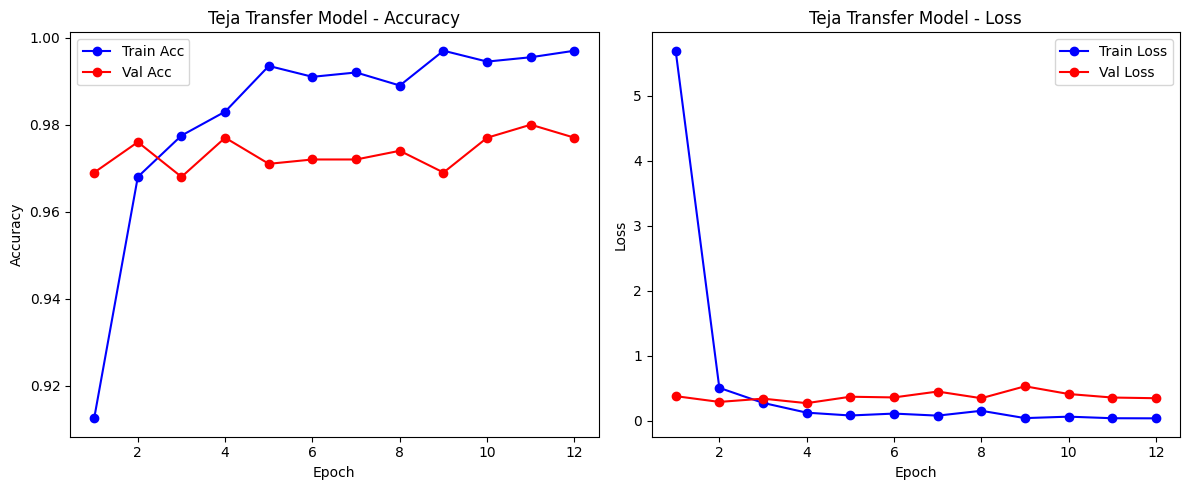

In [ ]:
import matplotlib.pyplot as plt

acc = history_transfer.history["accuracy"]
val_acc = history_transfer.history["val_accuracy"]
loss = history_transfer.history["loss"]
val_loss = history_transfer.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "bo-", label="Train Acc")
plt.plot(epochs, val_acc, "ro-", label="Val Acc")
plt.title("Teja Transfer Model - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "bo-", label="Train Loss")
plt.plot(epochs, val_loss, "ro-", label="Val Loss")
plt.title("Teja Transfer Model - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### **Fine-Tuning VGG16 Block**

**Load and Prepare the VGG16 Base**

In [ ]:
# Load VGG16 base model without top layers
teja_finetune_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)

# Freeze all layers initially
teja_finetune_base.trainable = False


**Step 2: Check Trainable Layers**

In [ ]:
# Check before unfreezing
teja_finetune_base.trainable = True
print("Trainable weights before freezing:", len(teja_finetune_base.trainable_weights))

# Freeze again
teja_finetune_base.trainable = False
print("Trainable weights after freezing:", len(teja_finetune_base.trainable_weights))

Trainable weights before freezing: 26
Trainable weights after freezing: 0


**Step 3: Add Data Augmentation & Custom Head**

In [ ]:
# Data augmentation
teja_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

# Input layer
input_tensor = keras.Input(shape=(180, 180, 3))
x = teja_augment(input_tensor)
x = keras.applications.vgg16.preprocess_input(x)
x = teja_finetune_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output_tensor = layers.Dense(1, activation="sigmoid")(x)

# Create model
teja_finetune_model = keras.Model(inputs=input_tensor, outputs=output_tensor)

# Initial compile
teja_finetune_model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

teja_finetune_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 180, 180, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 180, 180)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 180, 180)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 180, 180)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 180, 180, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 180, 180, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 5, 5, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 12800)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │      3,277,056 │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 256)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            257 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Step 4: Unfreeze Last 4 Layers Only**

In [ ]:
# Unfreeze base for fine-tuning
teja_finetune_base.trainable = True

# Freeze all layers except last 4
for layer in teja_finetune_base.layers[:-4]:
    layer.trainable = False

**Step 5: Re-Compile with Low Learning Rate**

In [ ]:
teja_finetune_model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["accuracy"]
)

**Step 6: Define Callbacks**

In [ ]:
fine_tune_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="teja_vgg16_finetune.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]

**Step 7: Train the Fine-Tuned Model**

In [ ]:
teja_finetune_history = teja_finetune_model.fit(
    ds_train_1000,
    epochs=11,  # Best accuracy as per your note
    validation_data=ds_val_500,
    callbacks=fine_tune_callbacks
)

Epoch 1/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.6143 - loss: 4.7191 - val_accuracy: 0.8990 - val_loss: 0.4618
Epoch 2/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.8019 - loss: 1.2555 - val_accuracy: 0.9300 - val_loss: 0.2758
Epoch 3/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.8591 - loss: 0.6437 - val_accuracy: 0.9520 - val_loss: 0.1935
Epoch 4/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.8995 - loss: 0.3275 - val_accuracy: 0.9550 - val_loss: 0.1521
Epoch 5/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.9113 - loss: 0.3074 - val_accuracy: 0.9590 - val_loss: 0.1356
Epoch 6/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9186 - loss: 0.2747 - val_accuracy: 0.9650 - val_loss: 0.1382
Epoch 7/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.9344 - loss: 0.2186 - val_accuracy: 0.9670 - val_loss: 0.1102
Epoch 8/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.9391 - loss: 0.1976 - val_accu

### **Final Evaluation Code for Fine-Tuned Model**

In [ ]:
# Load the fine-tuned VGG16 model from saved file
teja_loaded_finetuned_model = keras.models.load_model("teja_vgg16_finetune.keras")

# Evaluate the model on the test set
finetune_test_loss, finetune_test_acc = teja_loaded_finetuned_model.evaluate(ds_test_500)

# Print formatted result
print(f"Teja VGG16 Fine-Tuned Model - Test Accuracy: {finetune_test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9802 - loss: 0.0891
Teja VGG16 Fine-Tuned Model - Test Accuracy: 0.976


**Final Accuracy Comparison Chart**

In [ ]:
# Evaluate all custom models and store results
acc_basic_1000 = teja_model_basic.evaluate(ds_test_500)[1]
acc_dropout_1000 = teja_model_dropout.evaluate(ds_test_500)[1]
acc_l2 = teja_model_l2.evaluate(ds_test_500)[1]
acc_fullreg = teja_model_fullreg.evaluate(ds_test_500)[1]
acc_basic_500 = teja_model_basic_500.evaluate(ds_test_500)[1]
acc_basic_1500 = teja_model_basic_1500.evaluate(ds_test_500)[1]
acc_dropout_2000 = teja_model_dropout_2000.evaluate(ds_test_500)[1]
acc_finetuned = teja_loaded_finetuned_model.evaluate(ds_test_500)[1]

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.6982 - loss: 0.5763
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5094 - loss: 0.6935
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.4912 - loss: 0.7036
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.6770 - loss: 0.6576
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7198 - loss: 0.5685
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7278 - loss: 0.5554
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7296 - loss: 0.5478
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9726 - loss: 0.1032


**Accuracy Values for Plotting**

In [ ]:
# All accuracies in one list
teja_test_accuracies = [
    acc_basic_1000,
    acc_dropout_1000,
    acc_l2,
    acc_fullreg,
    acc_basic_500,
    acc_basic_1500,
    acc_dropout_2000,
    acc_finetuned
]

# Model names matching the custom training
teja_model_labels = [
    "Basic (1000)", "Dropout", "L2 Reg", "Dropout + L2",
    "Basic (500)", "Basic (1500)", "Dropout (2000)", "Fine-Tuned VGG16"
]

**Final Plot (Bar Chart)**

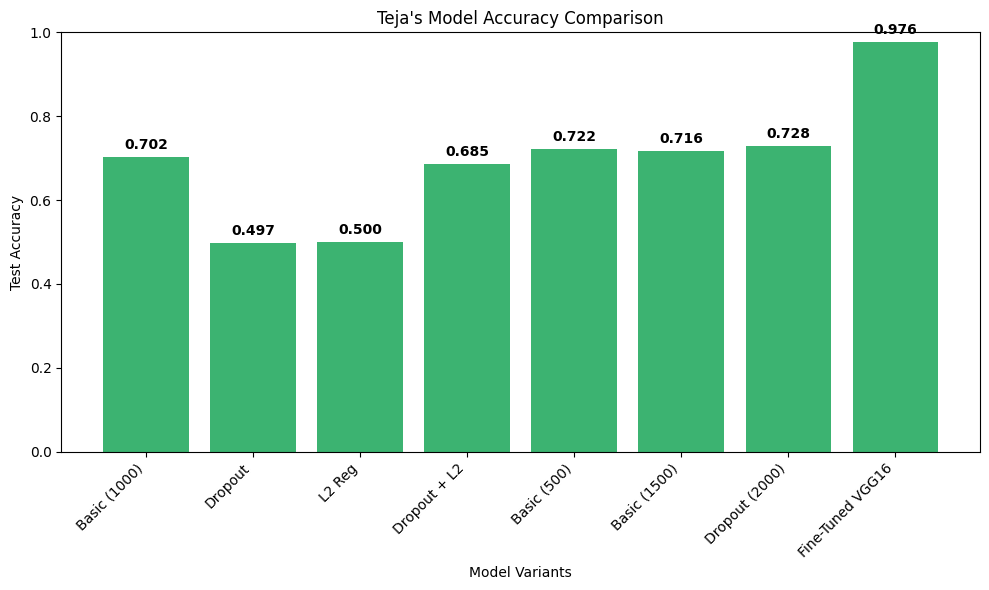

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(teja_model_labels, teja_test_accuracies, color='mediumseagreen')
plt.xlabel("Model Variants")
plt.ylabel("Test Accuracy")
plt.title("Teja's Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)

# Show accuracy values above bars
for i, acc in enumerate(teja_test_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()